In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')

# Preview data
data.head()


/var/folders/pp/3nx806hs7bl388g7c6clvc5h0000gn/T/ipykernel_3603/968559535.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


In [4]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

In [5]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


TransactionMonth: 23 unique values
Citizenship: 4 unique values
LegalType: 6 unique values
Title: 5 unique values
Language: 1 unique values
Bank: 11 unique values
AccountType: 3 unique values
MaritalStatus: 3 unique values
Gender: 3 unique values
Country: 1 unique values
Province: 9 unique values
MainCrestaZone: 16 unique values
SubCrestaZone: 45 unique values
ItemType: 1 unique values
VehicleType: 5 unique values
make: 46 unique values
Model: 411 unique values
bodytype: 13 unique values
VehicleIntroDate: 174 unique values
AlarmImmobiliser: 2 unique values
TrackingDevice: 2 unique values
CapitalOutstanding: 1011 unique values
NewVehicle: 2 unique values
WrittenOff: 2 unique values
Rebuilt: 2 unique values
Converted: 2 unique values
CrossBorder: 1 unique values
TermFrequency: 2 unique values
ExcessSelected: 13 unique values
CoverCategory: 28 unique values
CoverType: 22 unique values
CoverGroup: 14 unique values
Section: 5 unique values
Product: 4 unique values
StatutoryClass: 1 unique v

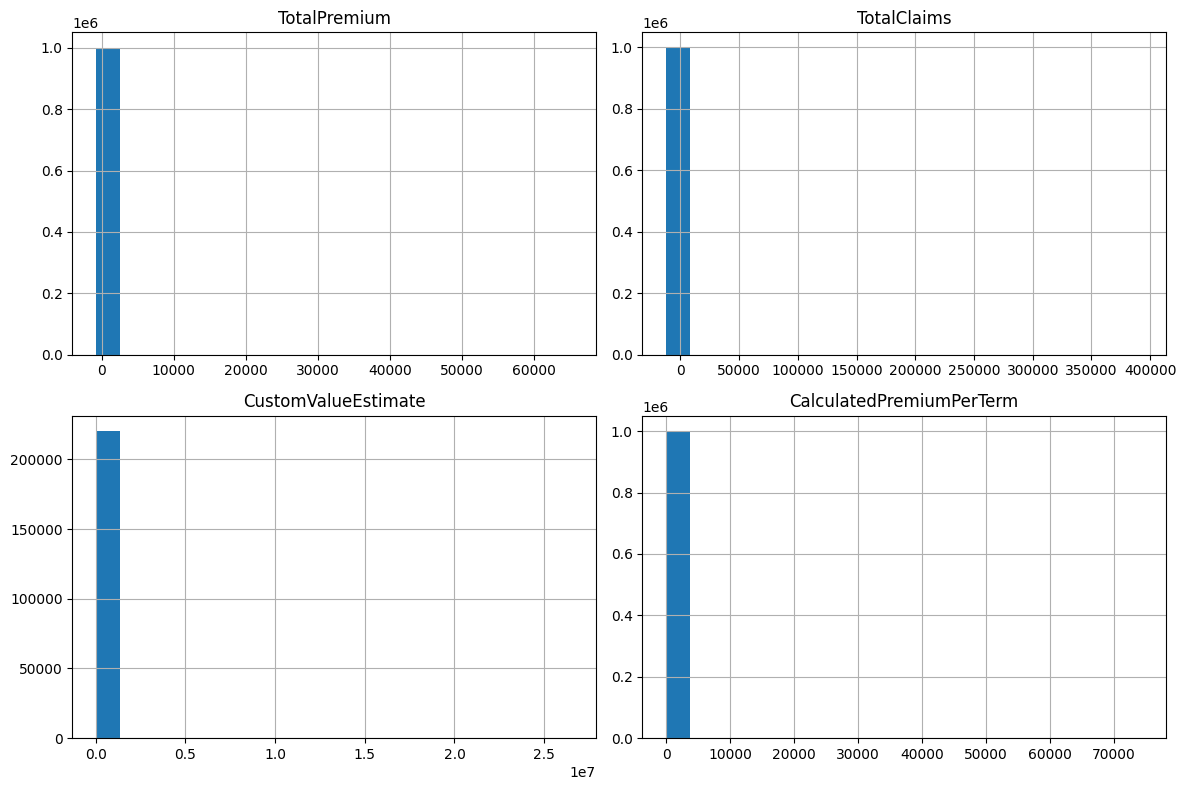

In [6]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']
data[numerical_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


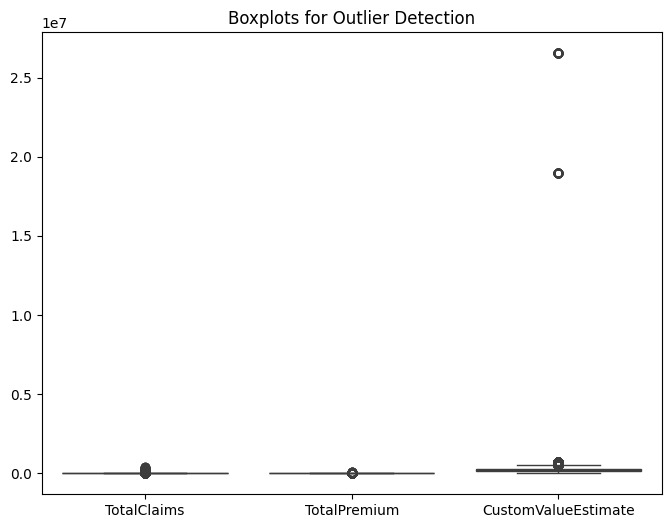

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[['TotalClaims', 'TotalPremium', 'CustomValueEstimate']])
plt.title('Boxplots for Outlier Detection')
plt.show()


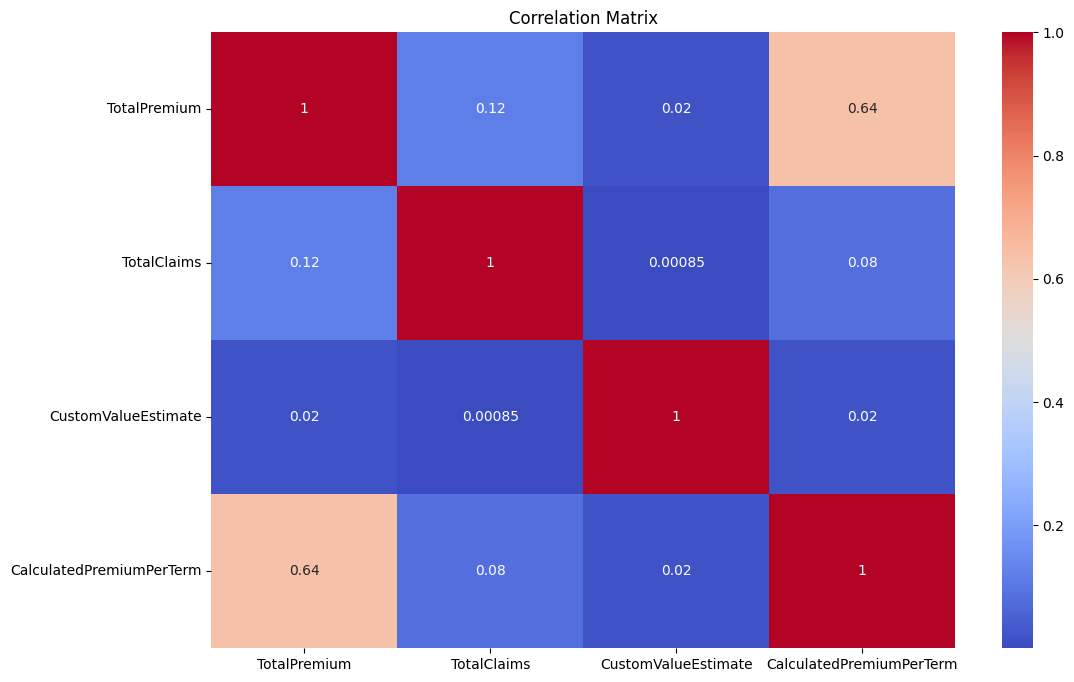

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


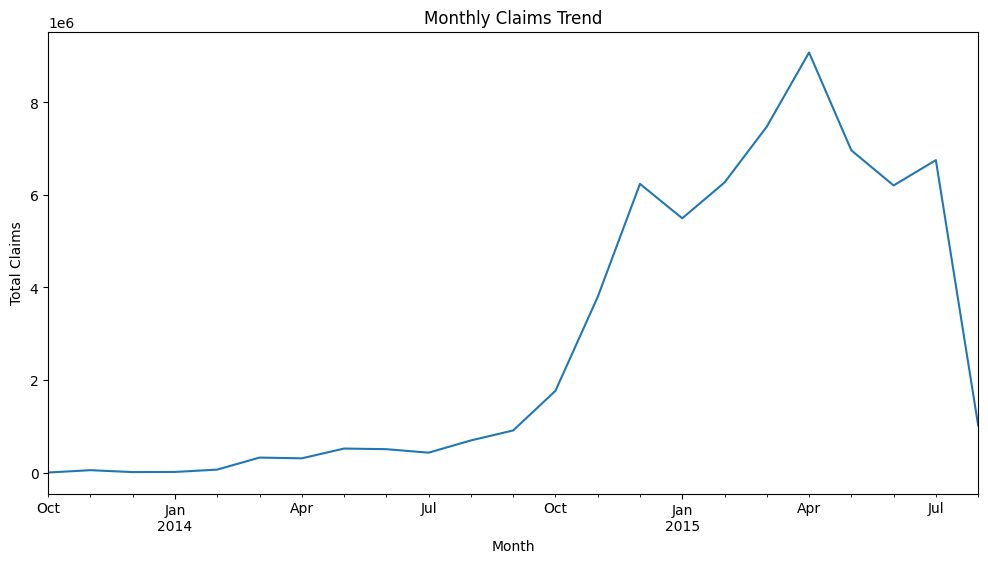

In [9]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
monthly_claims = data.groupby(data['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()

monthly_claims.plot(figsize=(12,6))
plt.title('Monthly Claims Trend')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.show()


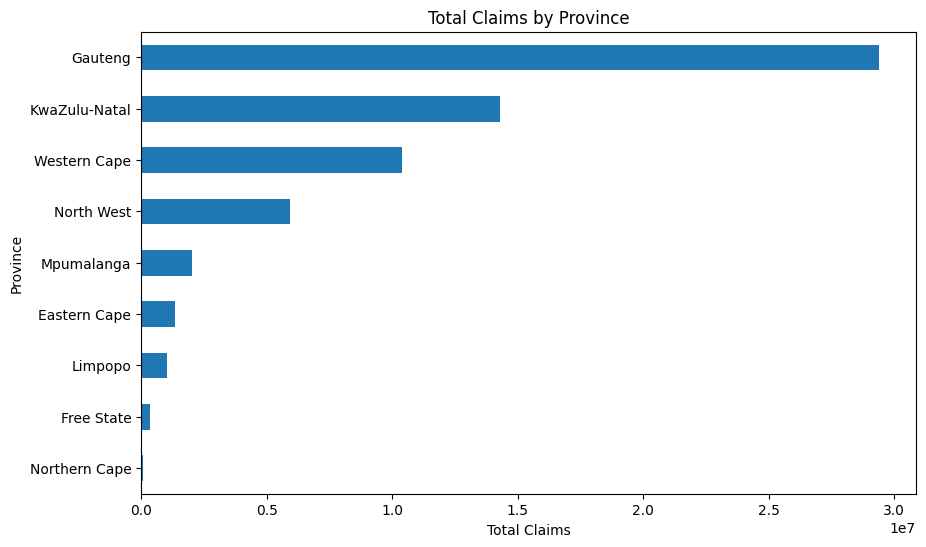

In [10]:
province_claims = data.groupby('Province')['TotalClaims'].sum().sort_values()
province_claims.plot(kind='barh', figsize=(10,6))
plt.title('Total Claims by Province')
plt.xlabel('Total Claims')
plt.show()


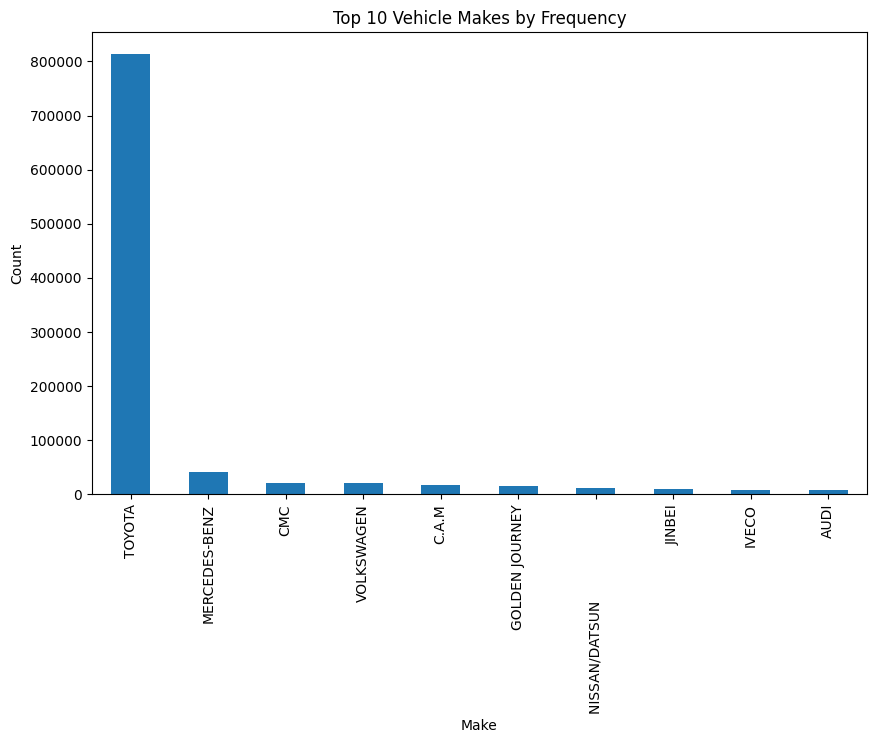

In [11]:
make_freq = data['make'].value_counts().head(10)
make_freq.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Vehicle Makes by Frequency')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()


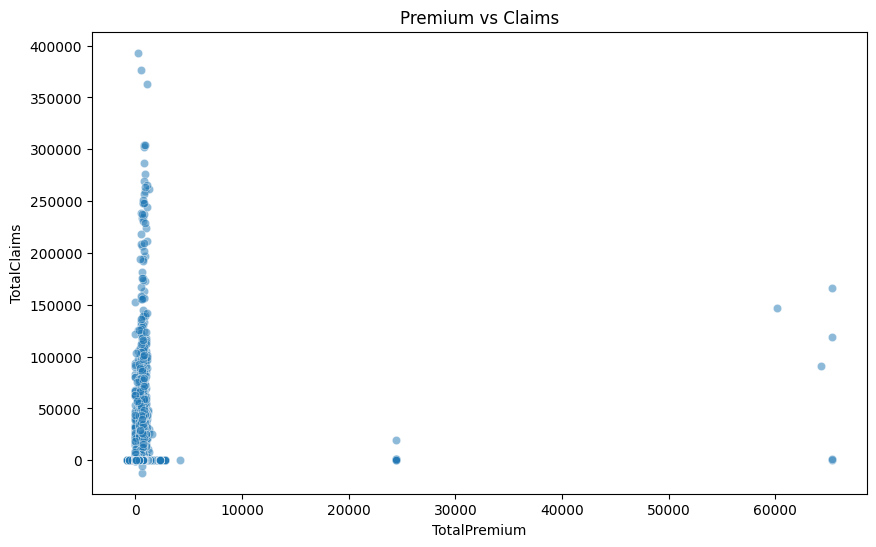

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, alpha=0.5)
plt.title('Premium vs Claims')
plt.show()


/Users/oza/Developer/10 Acadamy/week3/insurance-risk-analytics/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


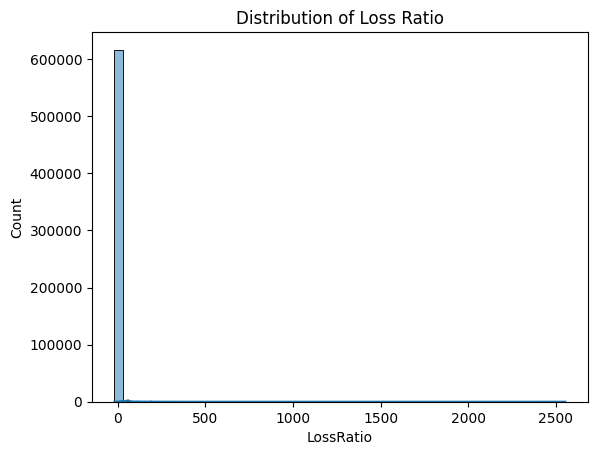

In [13]:
data['LossRatio'] = data['TotalClaims'] / data['TotalPremium']

# Summary statistics
data['LossRatio'].describe()

# Visualize distribution
sns.histplot(data['LossRatio'].dropna(), bins=50, kde=True)
plt.title('Distribution of Loss Ratio')
plt.show()


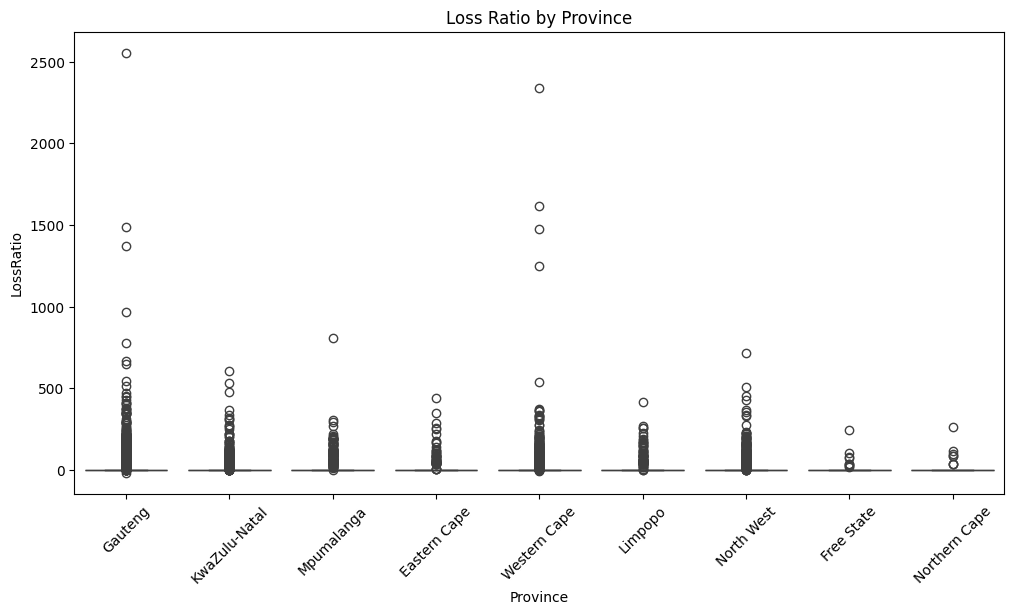

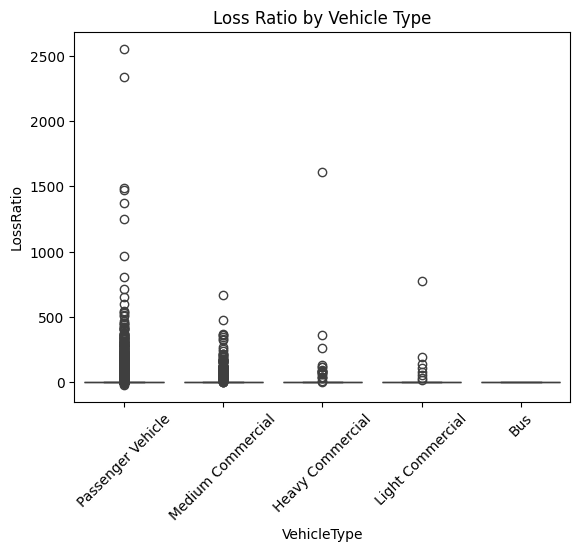

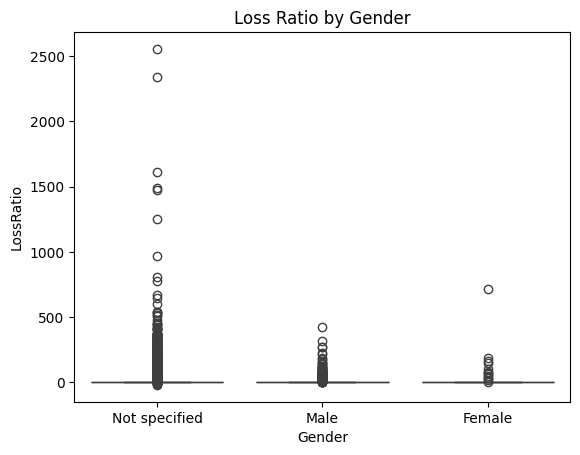

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Province', y='LossRatio', data=data)
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.show()

# Similar analysis for VehicleType, Gender:
sns.boxplot(x='VehicleType', y='LossRatio', data=data)
plt.title('Loss Ratio by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='Gender', y='LossRatio', data=data)
plt.title('Loss Ratio by Gender')
plt.show()


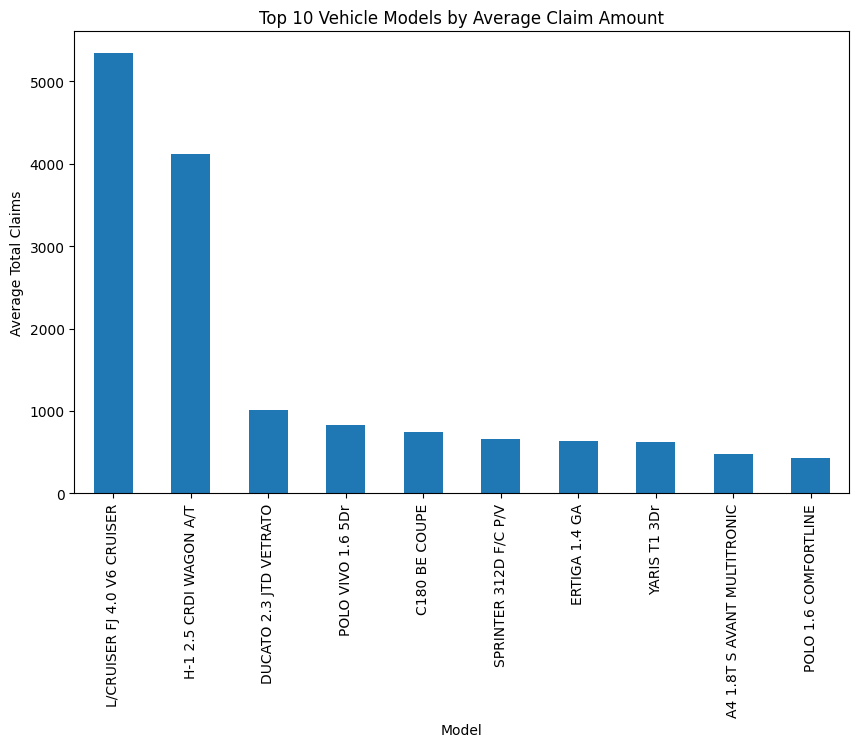

In [15]:
claims_by_model = data.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False).head(10)
claims_by_model.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Vehicle Models by Average Claim Amount')
plt.ylabel('Average Total Claims')
plt.show()


/var/folders/pp/3nx806hs7bl388g7c6clvc5h0000gn/T/ipykernel_3603/4226904230.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='TransactionMonth').agg({


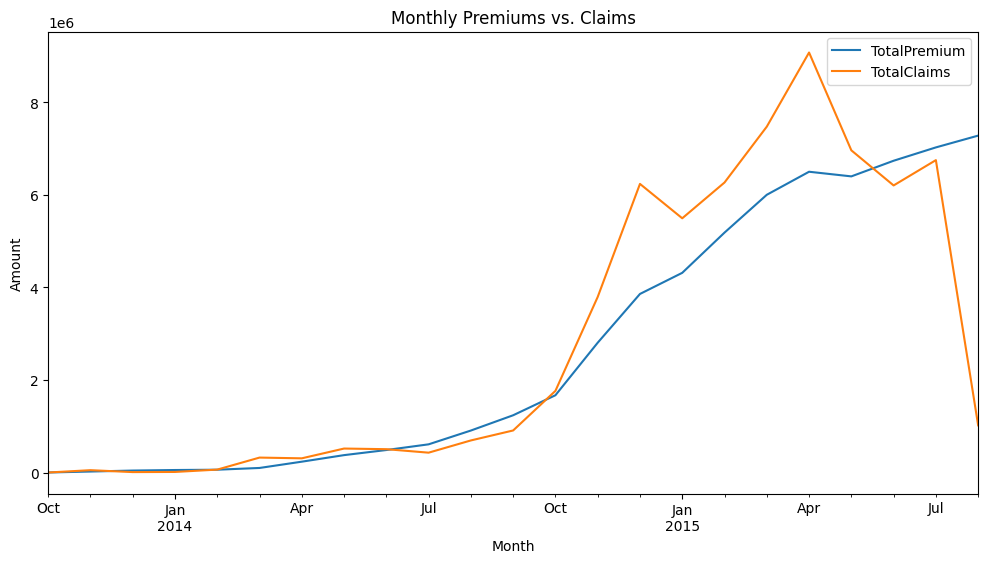

In [16]:
monthly_data = data.resample('M', on='TransactionMonth').agg({
    'TotalPremium':'sum',
    'TotalClaims':'sum'
})

monthly_data.plot(figsize=(12,6))
plt.title('Monthly Premiums vs. Claims')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()
